In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [2]:
model = Sequential()

model.add(layers.SimpleRNN(2, input_shape = (2,10)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 2)                 26        
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [3]:
model=Sequential()
model.add(layers.SimpleRNN(3, batch_input_shape=(8,2,10)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (8, 3)                    42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [4]:
model=Sequential()
model.add(layers.SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (8, 2, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [5]:
import pandas as pd

data = pd.read_csv("/content/sample_data/spam.csv", encoding="latin")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data["label"] = data["Category"].map({"spam":1, "ham":0})
data.head()

,Category,Message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
data["Message"].nunique(), data['label'].nunique()

(5157, 2)

In [8]:
data.drop_duplicates(subset=["Message"], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   object
 1   Message   5157 non-null   object
 2   label     5157 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 161.2+ KB


In [9]:
X_data = data["Message"]
y_data=data["label"]

In [15]:
import tensorflow as tf
from keras_preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

In [16]:
tokenizer.fit_on_texts(X_data)

sequences=tokenizer.texts_to_sequences(X_data)

In [17]:
print(sequences[0])

[46, 434, 4005, 777, 707, 659, 64, 8, 1201, 93, 121, 435, 1202, 143, 2708, 1203, 68, 56, 4006, 137]


In [18]:
word_index = tokenizer.word_index
print(word_index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, 'that': 17, 'on': 18, 'call': 19, '2': 20, 'are': 21, 'now': 22, 'so': 23, 'but': 24, 'not': 25, 'at': 26, 'can': 27, 'or': 28, "i'm": 29, 'do': 30, 'be': 31, 'get': 32, 'will': 33, 'just': 34, 'if': 35, 'with': 36, 'we': 37, 'no': 38, 'ur': 39, 'this': 40, 'up': 41, 'gt': 42, 'lt': 43, '4': 44, 'how': 45, 'go': 46, 'when': 47, 'from': 48, 'ok': 49, 'out': 50, 'all': 51, 'what': 52, 'free': 53, 'know': 54, 'like': 55, 'got': 56, 'then': 57, 'good': 58, 'come': 59, 'am': 60, 'time': 61, 'was': 62, 'its': 63, 'only': 64, 'day': 65, 'love': 66, 'want': 67, 'there': 68, 'he': 69, 'text': 70, 'send': 71, 'going': 72, 'one': 73, 'need': 74, 'by': 75, 'lor': 76, 'home': 77, 'as': 78, 'about': 79, 'still': 80, 'see': 81, 'txt': 82, 'back': 83, 'r': 84, 'stop': 85, 'da': 86, 'k': 87, 'today': 88, "i'll": 89, 'dont': 90, 'our': 91, 'hi': 92,

In [19]:
print((len(word_index)))

9007


In [20]:
X_data = sequences
print("최대길이:" , max(len(I) for I in X_data))
print("평균길이:" , (sum(map(len, X_data))/len(X_data)))

최대길이: 189
평균길이: 15.680628272251308


In [21]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [22]:
vocab_size = len(word_index)+1
max_len = 189
data = pad_sequences(X_data, maxlen=max_len)
print("data shape: ", data.shape)

data shape:  (5157, 189)


In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, y_data,
                                                    test_size = 0.3, 
                                                    random_state = 103)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3609, 189) (1548, 189) (3609,) (1548,)


In [26]:
model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation="sigmoid"))

In [29]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
history = model.fit(x_train, y_train, epochs = 10, batch_size=64, validation_split=0.2)

Epoch 1/10
46/46 [==============================] - 7s 99ms/step - loss: 0.3825 - acc: 0.8694 - val_loss: 0.2923 - val_acc: 0.9017
Epoch 2/10
46/46 [==============================] - 2s 47ms/step - loss: 0.1581 - acc: 0.9581 - val_loss: 0.2001 - val_acc: 0.9377
Epoch 3/10
46/46 [==============================] - 2s 47ms/step - loss: 0.1638 - acc: 0.9325 - val_loss: 0.1429 - val_acc: 0.9654
Epoch 4/10
46/46 [==============================] - 2s 47ms/step - loss: 0.0650 - acc: 0.9858 - val_loss: 0.0870 - val_acc: 0.9709
Epoch 5/10
46/46 [==============================] - 2s 46ms/step - loss: 0.0423 - acc: 0.9889 - val_loss: 0.0934 - val_acc: 0.9723
Epoch 6/10
46/46 [==============================] - 2s 47ms/step - loss: 0.0299 - acc: 0.9917 - val_loss: 0.0643 - val_acc: 0.9820
Epoch 7/10
46/46 [==============================] - 2s 47ms/step - loss: 0.0177 - acc: 0.9962 - val_loss: 0.0841 - val_acc: 0.9765
Epoch 8/10
46/46 [==============================] - 2s 47ms/step - loss: 0.0168 - a

In [30]:
model.evaluate(x_test, y_test)

49/49 [==============================] - 1s 24ms/step - loss: 0.0775 - acc: 0.9780


[0.07753972709178925, 0.9780361652374268]

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

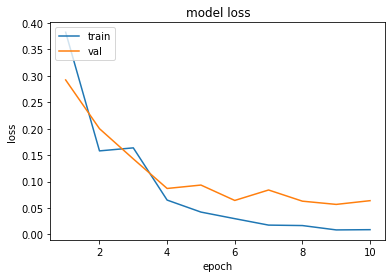

In [36]:
epochs= range(1, len(history.history['acc'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()